In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
df.drop(df[df['Borough'] == 'Not assigned'].index , inplace=True)

df = df.reset_index(drop=True)
#print(df.columns)
sort = df.sort_values(by ='Postal code' , ascending=True)
sort = sort.reset_index(drop=True)
sort.shape



(103, 3)

In [2]:
import csv
url = 'https://cocl.us/Geospatial_data'
data = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
data.head()
sort2 = data.sort_values(by ='Postal Code' , ascending=True)
sort2.head(10)

lat = sort2["Latitude"]
lon = sort2["Longitude"]
sort = pd.concat([sort,lat], axis = 1)
sort = pd.concat([sort,lon], axis = 1)
sort

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


In [3]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [6]:
canada_data = sort[sort['Borough'].str.contains("Toronto") ].reset_index(drop=True)
canada_data.head()

CLIENT_ID = 'H002AVLCTRPE0XD5DXOEMVPIDZAKXTOZJ5CH5LGLVLNA0YFP' # your Foursquare ID
CLIENT_SECRET = 'ZLEEBGZOGGPKCNYEB1QYULYZBAXRC01XYDVPR4KLC2VKGUSF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:

canada_venues = getNearbyVenues(names=canada_data['Neighborhood'],
                                   latitudes=canada_data['Latitude'],
                                   longitudes=canada_data['Longitude']
                                  )


The Beaches
The Danforth West / Riverdale
India Bazaar / The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park / Summerhill East
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
Rosedale
St. James Town / Cabbagetown
Church and Wellesley
Regent Park / Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond / Adelaide / King
Harbourfront East / Union Station / Toronto Islands
Toronto Dominion Centre / Design Exchange
Commerce Court / Victoria Hotel
Roselawn
Forest Hill North & West
The Annex / North Midtown / Yorkville
University of Toronto / Harbord
Kensington Market / Chinatown / Grange Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Stn A PO Boxes
First Canadian Place / Underground city
Christie
Dufferin / Dovercourt Village
Little Portugal / Trinity
Brockton / Parkdale Village / Exhibition Place
High Park / 

In [8]:
print(canada_venues.shape)
canada_venues.head()

(1602, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop


In [9]:
# one hot encoding
canada_onehot = pd.get_dummies(canada_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
canada_onehot['Neighborhood'] = canada_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]

canada_onehot.head()
canada_grouped = canada_onehot.groupby('Neighborhood').mean().reset_index()


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = canada_grouped['Neighborhood']

for ind in np.arange(canada_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(canada_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Cocktail Bar,Coffee Shop,Farmers Market,Seafood Restaurant,Bakery,Restaurant,Italian Restaurant,Café,Cheese Shop,Beer Bar
1,Brockton / Parkdale Village / Exhibition Place,Café,Breakfast Spot,Coffee Shop,Pet Store,Stadium,Bar,Restaurant,Bakery,Intersection,Italian Restaurant
2,Business reply mail Processing CentrE,Pizza Place,Auto Workshop,Skate Park,Comic Shop,Brewery,Gym / Fitness Center,Light Rail Station,Garden Center,Garden,Restaurant
3,CN Tower / King and Spadina / Railway Lands / ...,Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Boutique,Bar,Rental Car Location,Sculpture Garden,Plane,Boat or Ferry
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Bubble Tea Shop,Salad Place,Japanese Restaurant,Burger Joint,Ice Cream Shop,Yoga Studio


In [10]:
kclusters = 4


canada_grouped_clustering = canada_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(canada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

canada_merged = canada_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
canada_merged = canada_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

canada_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Coffee Shop,Asian Restaurant,Trail,Pub,Health Food Store,Women's Store,Dog Run,Diner,Discount Store,Distribution Center
1,M4K,East Toronto,The Danforth West / Riverdale,43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Frozen Yogurt Shop,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Pub,Pizza Place
2,M4L,East Toronto,India Bazaar / The Beaches West,43.668999,-79.315572,0,Fast Food Restaurant,Italian Restaurant,Ice Cream Shop,Fish & Chips Shop,Steakhouse,Pub,Brewery,Sushi Restaurant,Restaurant,Intersection
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Gastropub,Brewery,Bakery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Sandwich Place,Cheese Shop
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Park,Bus Line,Swim School,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


In [12]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [13]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Neighborhood'], canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

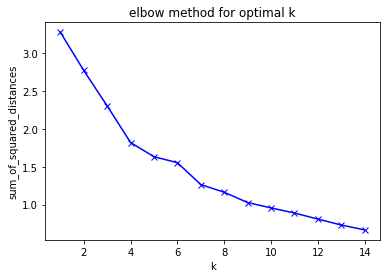

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

canada_grouped_clustering = canada_grouped.drop('Neighborhood', 1)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(canada_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()